## Analysing World Happiness 2019

In [ ]:
# import all required libraries
import pandas as pd
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

### Data Collection

For the analysis, we will scrape data using BeautifulSoup from two Wikipedia pages: World happiness report & List of countries by continents. After collecting the data from two pages, we will merge the collected data into one dataframe to analyse 

In [48]:
# links of wikipedia pages
Happiness_report_link = 'https://en.wikipedia.org/wiki/World_Happiness_Report#2019_report'
continents_link = 'https://simple.wikipedia.org/wiki/List_of_countries_by_continents'

In [49]:
continents_html = requests.get(continents_link)
continents_html

<Response [200]>

In [187]:
# first we will work for getting continents and countries in each continent 
soup = BeautifulSoup(continents_html.content, 'html.parser')
soup


<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of countries by continents - Simple English Wikipedia, the free encyclopedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"43d20b27-0eef-4d9e-a38e-3a6e9e0a6626","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_countries_by_continents","wgTitle":"List of countries by continents","wgCurRevisionId":6953317,"wgRevisionId":6953317,"wgArticleId":4810,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles needing additional references from January 2020","All articles needing ad

In [188]:
countries_tags = soup.find_all('ul')[1:7]

In [190]:
# get tags for continents names and scrape the text out of each tag and add it to a list 
continents_tags = soup.find_all('span', {'class' : 'toctext'})[0:7]
continents=[]
for tag in continents_tags:
    continent = tag.getText()
    continents.append(continent)

In [191]:
# displying all continents obtained form wikipedia page in form of list
continents

['Africa',
 'Antarctica',
 'Asia',
 'Europe',
 'North America',
 'South America',
 'Oceania/Australia']

In [192]:
# get all countries from countries_tags and make list of lists datatype
countries=[]
for tag in countries_tags:
    countries.append(tag.getText().splitlines())

In [193]:
# displying all countries obtained form wikipedia page in form of lists of list
countries

[['Algeria - Algiers',
  'Angola - Luanda',
  'Benin - Porto Novo, Cotonou',
  'Botswana - Gaborone',
  'Burkina Faso - Ouagadougou',
  'Burundi - Gitega',
  'Cameroon (also spelled Cameroun) - Yaoundé',
  'Cape Verde - Praia',
  'Central African Republic - Bangui',
  "Chad (Tchad) - N'Djamena",
  'Comoros - Moroni',
  'Republic of the Congo - Brazzaville',
  'Democratic Republic of the Congo (Zaire) - Kinshasa',
  "Côte d'Ivoire (Ivory Coast) - Yamoussoukro",
  'Djibouti - Djibouti',
  'Egypt (Misr) - Cairo',
  'Equatorial Guinea - Malabo',
  'Eritrea - Asmara',
  'Ethiopia (Abyssinia) - Addis Ababa',
  'Gabon - Libreville',
  'The Gambia - Banjul',
  'Ghana - Accra',
  'Guinea - Conakry',
  'Guinea-Bissau - Bissau',
  'Kenya - Nairobi',
  'Lesotho - Maseru',
  'Liberia - Monrovia',
  'Libya - Tripoli',
  'Madagascar - Antananarivo',
  'Malawi - Lilongwe',
  'Mali - Bamako',
  'Mauritania - Nouakchott',
  'Mauritius - Port Louis',
  'Morocco (Al Maghrib) - Rabat',
  'Mozambique - Mapu

In [194]:
# since we do not have any country for Antarctica, so we add empty list relevant to that to make length of countries and continents same 
countries_list = [countries[0],[],countries[1],countries[2],countries[3],countries[4],countries[5]]

In [195]:
# clean the name of countries 
countries_list2 =[]

for lst in countries_list:
    cleaned_list = []
    for country in lst:
        country_name = country.split('-')[0]
        country_name = country_name.split('(')[0]
        country_name = country_name.split('[')[0]
        country_name = country_name.split('*')[0]
        cleaned_list.append(country_name.strip())
    countries_list2.append(cleaned_list)

In [196]:
# make a dictionary with keys as continents and values as relevant countries list for each continent 
continents_countries = {}
count = 0
for continent in continents:
    continents_countries[continent] = countries_list2[count]
    count = count+1

In [197]:
# name of all the countries per continent from English Wikipedia
continents_countries

{'Africa': ['Algeria',
  'Angola',
  'Benin',
  'Botswana',
  'Burkina Faso',
  'Burundi',
  'Cameroon',
  'Cape Verde',
  'Central African Republic',
  'Chad',
  'Comoros',
  'Republic of the Congo',
  'Democratic Republic of the Congo',
  "Côte d'Ivoire",
  'Djibouti',
  'Egypt',
  'Equatorial Guinea',
  'Eritrea',
  'Ethiopia',
  'Gabon',
  'The Gambia',
  'Ghana',
  'Guinea',
  'Guinea',
  'Kenya',
  'Lesotho',
  'Liberia',
  'Libya',
  'Madagascar',
  'Malawi',
  'Mali',
  'Mauritania',
  'Mauritius',
  'Morocco',
  'Mozambique',
  'Namibia',
  'Niger',
  'Nigeria',
  'Rwanda',
  'São Tomé and Príncipe',
  'Senegal',
  'Seychelles',
  'Sierra Leone',
  'Somalia',
  'South Africa',
  'South Sudan',
  'Sudan',
  'Swaziland',
  'Tanzania',
  'Togo',
  'Tunisia',
  'Uganda',
  'Western Sahara',
  'Zambia',
  'Zimbabwe'],
 'Antarctica': [],
 'Asia': ['Afghanistan',
  'Armenia',
  'Azerbaijan',
  'Bahrain',
  'Bangladesh',
  'Bhutan',
  'Brunei',
  'Cambodia',
  'China',
  'East Timor',

### Scraping World Happiness Report 2019

In [205]:
# getting the happiness report table from other link now 
happiness_report_2019 = pd.read_html(Happiness_report_link, header=0)[4]

In [206]:
happiness_report_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [207]:
# making name of some countries that differ in 2 datasets same, so that we can assign continent to each country
happiness_report_2019['Country or region'].replace('Ireland','Republic of Ireland',inplace=True)
happiness_report_2019['Country or region'].replace('United States of America','United States',inplace=True)
happiness_report_2019['Country or region'].replace('Trinidad & Tobago','Trinidad and Tobago',inplace=True)
happiness_report_2019['Country or region'].replace('Northern Cyprus','Cyprus',inplace=True)
happiness_report_2019['Country or region'].replace('Ivory Coast',"Côte d'Ivoire",inplace=True)
happiness_report_2019['Country or region'].replace('Congo (Brazzaville)','Republic of the Congo',inplace=True)
happiness_report_2019['Country or region'].replace('Congo (Kinshasa)','Democratic Republic of the Congo',inplace=True)
happiness_report_2019['Country or region'].replace('Template:Palestinian Territories','Palestine',inplace=True)
happiness_report_2019['Country or region'].replace('Gambia','The Gambia',inplace=True)
happiness_report_2019['Country or region'].replace('Eswatini','Swaziland',inplace=True)

In [208]:
# add continent column in the table 
for key,values in continents_countries.items():
    for country in values:
        if country in happiness_report_2019['Country or region'].values:
            row_index = happiness_report_2019.loc[happiness_report_2019['Country or region'] == country].index
            happiness_report_2019.loc[row_index,"continent"] = key

In [209]:
# Creating countries-continents dataframe which have two columns: country , continent.
countries_continents_df = pd.DataFrame(happiness_report_2019, columns=["Country or region","continent"])
countries_continents_df.rename(columns={"Country or region":"country"},inplace = True)
countries_continents_df.head()

,country,continent
0,Finland,Europe
1,Denmark,Europe
2,Norway,Europe
3,Iceland,Europe
4,Netherlands,Europe


In [210]:
# setting country as index column
happiness_report_2019.rename(columns={"Country or region":"country"},inplace = True)
happiness_report_2019 = happiness_report_2019.set_index('country')
happiness_report_2019.head()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,continent
country,,,,,,,,,
Finland,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Europe
Denmark,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Europe
Norway,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Europe
Iceland,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Europe
Netherlands,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Europe


In [211]:
# saving all collected information in csv file 
happiness_report_2019.to_csv("happiness_report_2019.csv")

### Data Visualization


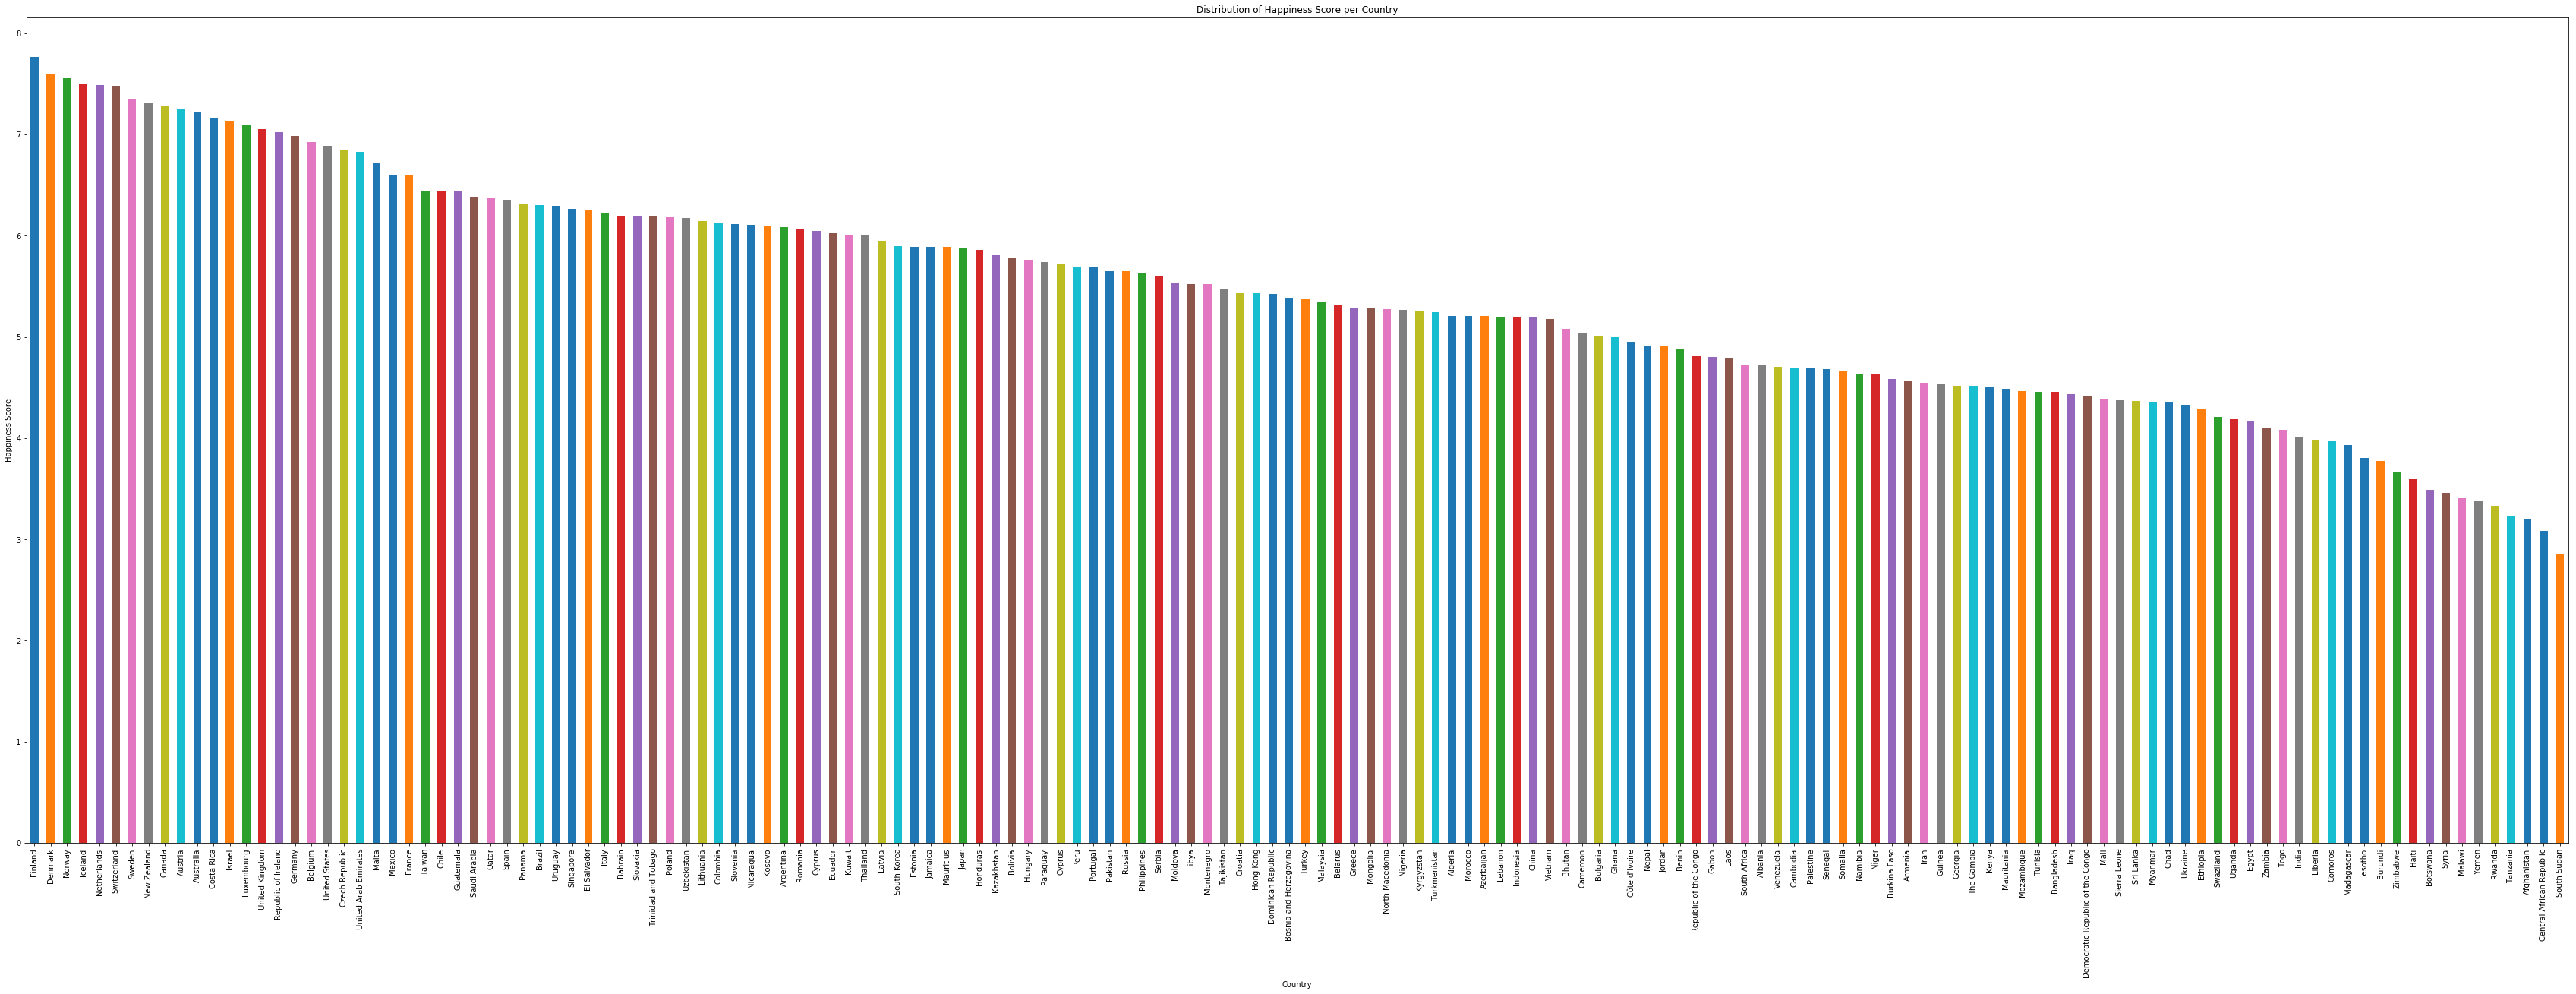

In [83]:
# Plotting the distribution of happiness score per country.
plt.figure(figsize=(60,20))
happiness_report_2019['Score'].plot(kind="bar")
plt.xlabel("Country")
plt.ylabel("Happiness Score")
plt.title("Distribution of Happiness Score per Country")
plt.savefig('graph.png')

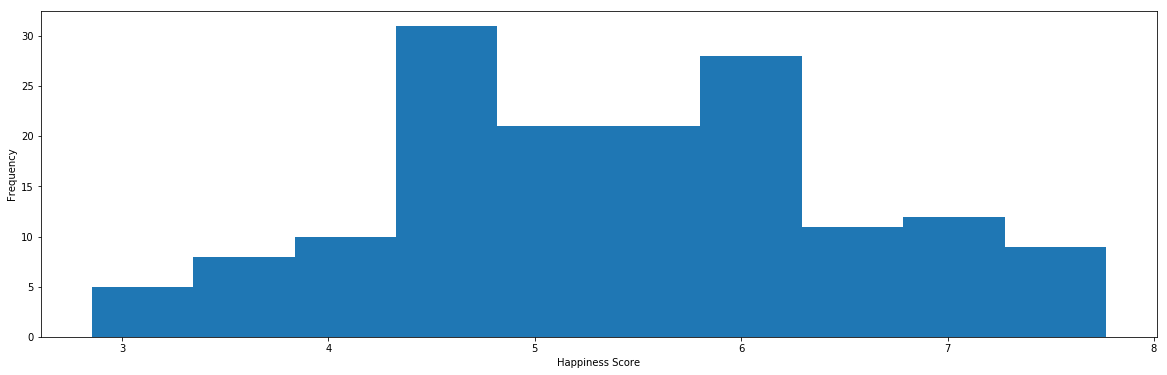

In [84]:
# Plot the histogram of happiness scores taking into account happiness scores of all countries 
plt.figure(figsize=(20,6))
happiness_report_2019['Score'].plot(kind="hist")
plt.xlabel("Happiness Score")
plt.show()

In [27]:
# Finding the top 10 happiest countries and saving it to list 
happiness_report_2019 = happiness_report_2019.sort_values(by=["Score"],ascending=False)
ten_happiest_countries = happiness_report_2019.index.tolist()[0:10]
ten_happiest_countries

['Finland',
 'Denmark',
 'Norway',
 'Iceland',
 'Netherlands',
 'Switzerland',
 'Sweden',
 'New Zealand',
 'Canada',
 'Austria']

In [87]:
# data frame for top_ten_countries 
happiness_report_2019.iloc[:10,:]

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,continent
country,,,,,,,,,
Finland,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Europe
Denmark,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Europe
Norway,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Europe
Iceland,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Europe
Netherlands,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Europe
Switzerland,6,7.480,1.452,1.526,1.052,0.572,0.263,0.343,Europe
Sweden,7,7.343,1.387,1.487,1.009,0.574,0.267,0.373,Europe
New Zealand,8,7.307,1.303,1.557,1.026,0.585,0.330,0.380,Oceania/Australia
Canada,9,7.278,1.365,1.505,1.039,0.584,0.285,0.308,North America


In [89]:
# finding the average of happiness
avg_happiness = happiness_report_2019['Score'].mean()
avg_happiness

5.407032051282051

In [90]:
# finding median value of happiness score column
median_value = happiness_report_2019['Score'].median()

In [91]:
# finding countries below median value and saving as list 
countries_below_median = happiness_report_2019[happiness_report_2019['Score'] < median_value].index.tolist()
countries_below_median

['Turkey',
 'Malaysia',
 'Belarus',
 'Greece',
 'Mongolia',
 'North Macedonia',
 'Nigeria',
 'Kyrgyzstan',
 'Turkmenistan',
 'Algeria',
 'Morocco',
 'Azerbaijan',
 'Lebanon',
 'Indonesia',
 'China',
 'Vietnam',
 'Bhutan',
 'Cameroon',
 'Bulgaria',
 'Ghana',
 "Côte d'Ivoire",
 'Nepal',
 'Jordan',
 'Benin',
 'Republic of the Congo',
 'Gabon',
 'Laos',
 'South Africa',
 'Albania',
 'Venezuela',
 'Cambodia',
 'Palestine',
 'Senegal',
 'Somalia',
 'Namibia',
 'Niger',
 'Burkina Faso',
 'Armenia',
 'Iran',
 'Guinea',
 'Georgia',
 'The Gambia',
 'Kenya',
 'Mauritania',
 'Mozambique',
 'Tunisia',
 'Bangladesh',
 'Iraq',
 'Democratic Republic of the Congo',
 'Mali',
 'Sierra Leone',
 'Sri Lanka',
 'Myanmar',
 'Chad',
 'Ukraine',
 'Ethiopia',
 'Swaziland',
 'Uganda',
 'Egypt',
 'Zambia',
 'Togo',
 'India',
 'Liberia',
 'Comoros',
 'Madagascar',
 'Lesotho',
 'Burundi',
 'Zimbabwe',
 'Haiti',
 'Botswana',
 'Syria',
 'Malawi',
 'Yemen',
 'Rwanda',
 'Tanzania',
 'Afghanistan',
 'Central African Repu

In [92]:
# data frame of countries below median value 
happiness_report_2019[happiness_report_2019['Score'] < median_value]

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,continent
country,,,,,,,,,
Turkey,79,5.373,1.183,1.360,0.808,0.195,0.083,0.106,Asia
Malaysia,80,5.339,1.221,1.171,0.828,0.508,0.260,0.024,Asia
Belarus,81,5.323,1.067,1.465,0.789,0.235,0.094,0.142,Europe
Greece,82,5.287,1.181,1.156,0.999,0.067,0.000,0.034,Europe
Mongolia,83,5.285,0.948,1.531,0.667,0.317,0.235,0.038,Asia
North Macedonia,84,5.274,0.983,1.294,0.838,0.345,0.185,0.034,Europe
Nigeria,85,5.265,0.696,1.111,0.245,0.426,0.215,0.041,Africa
Kyrgyzstan,86,5.261,0.551,1.438,0.723,0.508,0.300,0.023,Asia
Turkmenistan,87,5.247,1.052,1.538,0.657,0.394,0.244,0.028,Asia


In [93]:
# showing correlation values of different variables 
correlation_table = happiness_report_2019.corr()
correlation_table

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.989092,-0.802983,-0.767876,-0.787574,-0.546908,-0.056377,-0.348263
Score,-0.989092,1.000000,0.795287,0.777333,0.780018,0.566778,0.082999,0.382168
GDP per capita,-0.802983,0.795287,1.000000,0.757348,0.838715,0.376613,-0.070716,0.299555
Social support,-0.767876,0.777333,0.757348,1.000000,0.719159,0.448972,-0.038768,0.177876
Healthy life expectancy,-0.787574,0.780018,0.838715,0.719159,1.000000,0.390872,-0.023284,0.292454
Freedom to make life choices,-0.546908,0.566778,0.376613,0.448972,0.390872,1.000000,0.281704,0.430865
Generosity,-0.056377,0.082999,-0.070716,-0.038768,-0.023284,0.281704,1.000000,0.312020
Perceptions of corruption,-0.348263,0.382168,0.299555,0.177876,0.292454,0.430865,0.312020,1.000000


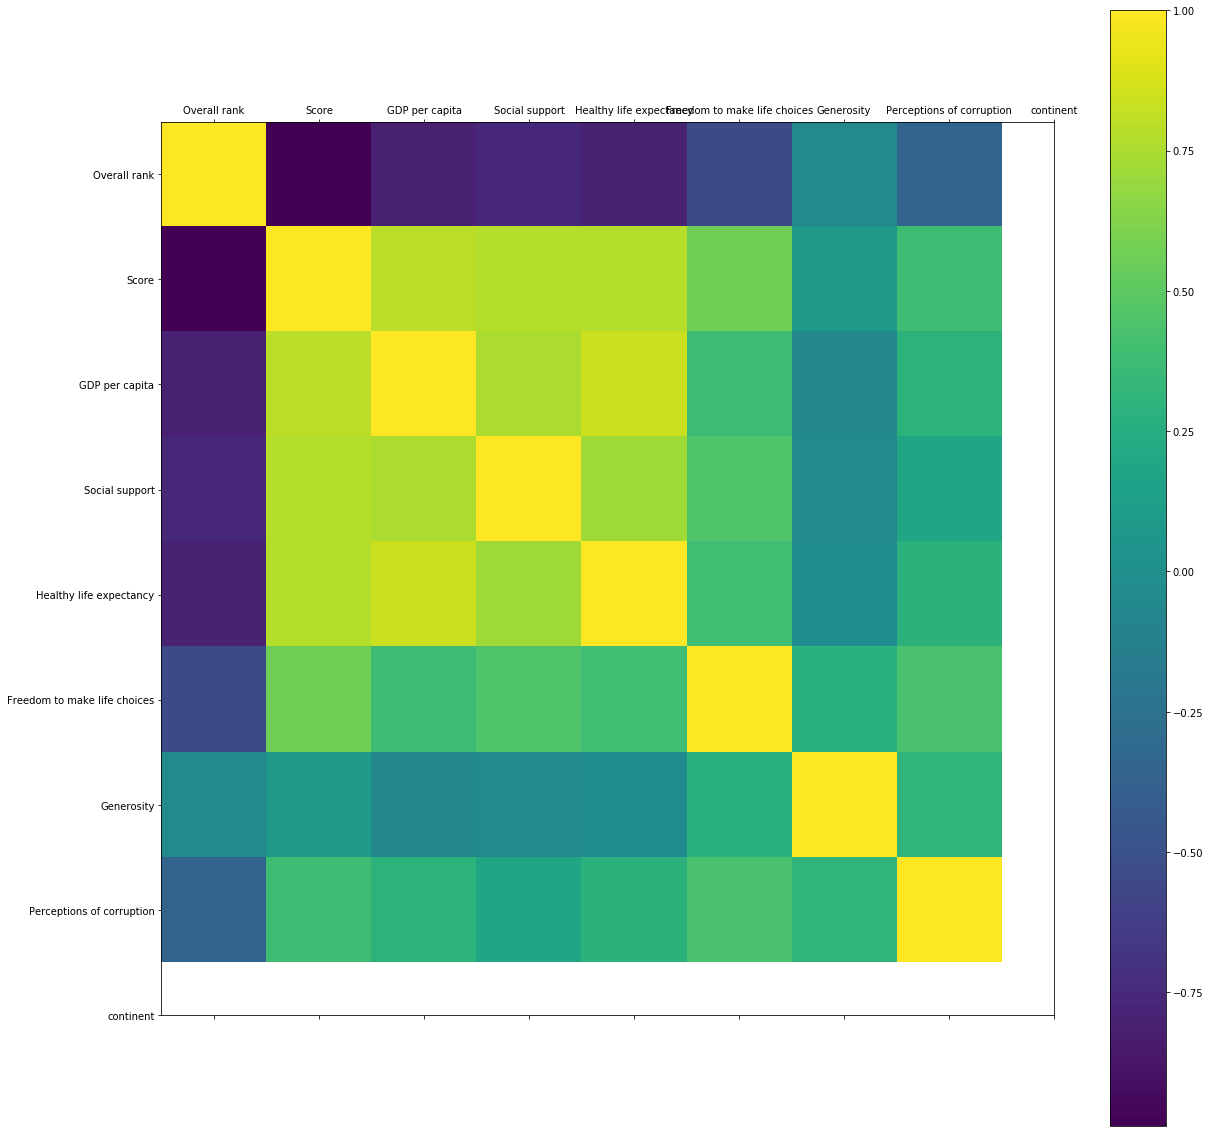

In [33]:
# Plotting the correlation between different variables
f = plt.figure(figsize=(20, 20))
plt.matshow(correlation_table, fignum=f.number)
plt.xticks(range(len(happiness_report_2019.columns)), happiness_report_2019.columns)
plt.yticks(range(len(happiness_report_2019.columns)), happiness_report_2019.columns)
plt.colorbar()
plt.show()

The table and the plot above table shows the value of 1.0 at the diagonal because correlation of each variable with itself is perfect. Moreover, we see a high negative correlation between score and overall rank.GDP per capita, social support, health life expectancy show high positive correlation with Score. So if a correlation value is high postive then there exists a relationship between two variables in which both variables move in tandem and vice versa 

In [212]:
correlation_table.style.background_gradient(cmap='coolwarm').set_precision(2)

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1,-0.99,-0.8,-0.77,-0.79,-0.55,-0.056,-0.35
Score,-0.99,1,0.8,0.78,0.78,0.57,0.083,0.38
GDP per capita,-0.8,0.8,1,0.76,0.84,0.38,-0.071,0.3
Social support,-0.77,0.78,0.76,1,0.72,0.45,-0.039,0.18
Healthy life expectancy,-0.79,0.78,0.84,0.72,1,0.39,-0.023,0.29
Freedom to make life choices,-0.55,0.57,0.38,0.45,0.39,1,0.28,0.43
Generosity,-0.056,0.083,-0.071,-0.039,-0.023,0.28,1,0.31
Perceptions of corruption,-0.35,0.38,0.3,0.18,0.29,0.43,0.31,1


In [213]:
new_df = happiness_report_2019[['continent','Score']].reset_index()
df = df[['continent','Score']]

In [214]:
# for each continent, we find the happiest country
counter=0
happiest_country_percontinent = df.groupby(['continent']).max()
happiest_country_percontinent.reset_index(inplace=True)
for score in happiest_country_percontinent['Score']:
    happiest_country_percontinent.loc[counter,'country']=(happiness_report_2019[happiness_report_2019['Score']==score].index)
    counter = counter+1
happiest_country_percontinent.set_index('country',inplace=True)
happiest_country_percontinent

,continent,Score
country,,
Mauritius,Africa,5.888
Israel,Asia,7.139
Finland,Europe,7.769
Canada,North America,7.278
New Zealand,Oceania/Australia,7.307
Chile,South America,6.444


Text(0.5,0,'happiness score')

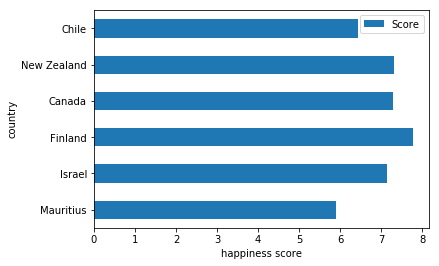

In [215]:
# plotting score of happiest country for each continent 
happiest_country_percontinent.plot(kind='barh')
plt.xlabel("happiness score")

So for continent Africa, Mauritius has highest happiness score of 5.888 and so on for other continents.

In [216]:
# END